In [1]:
import uproot
import awkward
from awkward import JaggedArray
import plotly.express as px
import pandas as pd


In [2]:
import plotly.graph_objects as go
import numpy as np

In [3]:
import matplotlib.pyplot as pp


In [4]:
myEvList = []

In [5]:
filenames1=["NonSmeared", "Smeared_jleic", "Smeared_beast"]
basename1="mydiHad"
basename="mydiHadNonSmeared_"
basenames=["mydiHadNonSmeared_","mydiHadSmeared_"]
filenames=[ "45Plus5","100Plus5", "100Plus10", "275Plus18"]

In [6]:
for fn in filenames:
     print(fn)
                     

45Plus5
100Plus5
100Plus10
275Plus18


In [7]:
for fn in filenames:
    for base in basenames:
        evts=uproot.open(base+fn+".root")['events']
        print("opening "+base+fn+".root")
        myEvList.append(evts)
                     

opening mydiHadNonSmeared_45Plus5.root
opening mydiHadSmeared_45Plus5.root
opening mydiHadNonSmeared_100Plus5.root
opening mydiHadSmeared_100Plus5.root
opening mydiHadNonSmeared_100Plus10.root
opening mydiHadSmeared_100Plus10.root
opening mydiHadNonSmeared_275Plus18.root
opening mydiHadSmeared_275Plus18.root


In [8]:
type(myEvList[5])

uproot.rootio.ROOTDirectory

In [9]:
myEvList[0]['tree'].array("p").content[0]

2.3586551119823396

In [10]:
myVars =["p", "px", "py", "pz", "pdg", "smear_orig_px", "smear_orig_py","smear_orig_py", "smear_orig_pz"]

In [11]:
myDFs=[]

In [28]:
for ev in myEvList:
    df = pd.DataFrame()
    for vars in myVars:
        df[vars]=ev['tree'].array(vars).content
    myDFs.append(df)

In [13]:
from FunctionsForDataAna2 import getEta

In [29]:
len(myDFs)


8

In [14]:
myDFs[0].head(10)

,p,px,py,pz,pdg,smear_orig_px,smear_orig_py,smear_orig_pz
0,2.358655,-0.945360,-0.606011,2.074198,-11,0.0,0.0,0.0
1,1.693408,1.054523,-0.251235,-1.300958,211,0.0,0.0,0.0
2,0.624548,-0.154143,-0.515441,-0.317209,-211,0.0,0.0,0.0
3,1.816069,-0.987706,-0.352244,1.482723,-11,0.0,0.0,0.0
4,1.486216,1.475525,0.152073,0.092400,211,0.0,0.0,0.0
5,0.764904,0.477111,-0.524413,-0.287113,-211,0.0,0.0,0.0
6,2.733030,-0.434219,1.085610,2.470295,-11,0.0,0.0,0.0
7,1.190663,0.460644,-1.092976,-0.104343,211,0.0,0.0,0.0
8,1.180742,-0.010155,-1.027906,-0.580911,-211,0.0,0.0,0.0
9,3.949320,-0.959840,-0.768164,3.753100,-11,0.0,0.0,0.0


In [15]:
myDFs[1].head(10)

,p,px,py,pz,pdg,smear_orig_px,smear_orig_py,smear_orig_pz
0,2.360413,-0.605382,-0.944535,2.076756,-11,-0.945360,-0.606011,2.074198
1,1.696544,-0.252050,1.057712,-1.302296,211,1.054523,-0.251235,-1.300958
2,0.629250,-0.519636,-0.155069,-0.319198,-211,-0.154143,-0.515441,-0.317209
3,1.850032,-0.358465,-1.005579,1.510937,-11,-0.987706,-0.352244,1.482723
4,1.478876,0.151348,1.468417,0.088996,211,1.475525,0.152073,0.092400
5,0.776113,-0.532224,0.484023,-0.291222,-211,0.477111,-0.524413,-0.287113
6,2.848639,1.131959,-0.451023,2.574877,-11,-0.434219,1.085610,2.470295
7,1.166848,-1.072132,0.449323,-0.100873,211,0.460644,-1.092976,-0.104343
8,1.186252,-1.032549,-0.011329,-0.583874,-211,-0.010155,-1.027906,-0.580911
9,3.901612,-0.755779,-0.944825,3.709269,-11,-0.959840,-0.768164,3.753100


In [30]:
for df in myDFs:
    df['eta']=df.apply(lambda row: getEta(row['px'],row['py'],row['pz']), axis=1)

In [17]:
myDFs=[]

In [18]:
myDFs[0].head(100)["pdg"]==-211

IndexError: list index out of range

In [31]:
beamEIndex=6

In [32]:
elecEta=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==-11,'eta']

In [33]:
piPlusEta=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==211,'eta']

In [34]:
piMinusEta=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==-211,'eta']

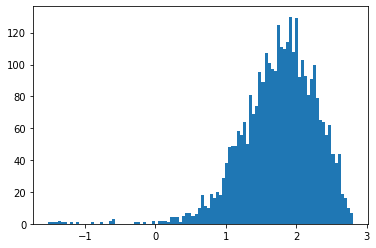

In [35]:
hElecEta=pp.hist(elecEta,bins=100)

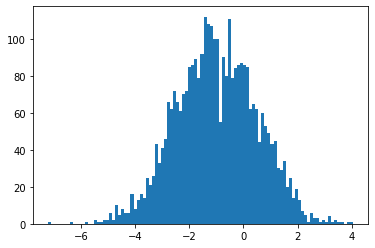

In [36]:
hPiMinusEta=pp.hist(piMinusEta,bins=100)

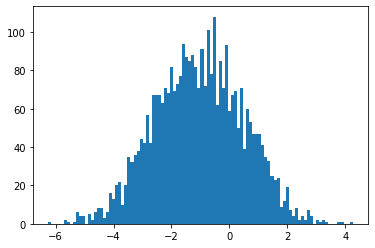

In [37]:
hPiPlusEta=pp.hist(piPlusEta,bins=100)

In [38]:
elecP=myDFs[3].head(10000).loc[myDFs[3].head(10000)['pdg']==-11,'p']

(array([ 6., 22., 18., 12., 12., 22., 18.,  9., 16., 16., 18., 10., 15.,
        13., 24., 14., 16., 16., 17., 18., 21., 19., 20., 22., 18., 23.,
        22., 23., 21., 40., 21., 25., 30., 19., 31., 26., 27., 22., 37.,
        30., 34., 28., 32., 27., 36., 31., 33., 41., 42., 34., 40., 38.,
        36., 26., 27., 39., 31., 38., 34., 31., 34., 41., 43., 33., 47.,
        35., 39., 33., 47., 42., 46., 42., 42., 44., 46., 38., 55., 45.,
        46., 60., 49., 67., 43., 35., 49., 50., 67., 40., 55., 55., 55.,
        59., 66., 48., 57., 44., 71., 50., 25.,  4.]),
 array([14.83419288, 15.50778517, 16.18137745, 16.85496973, 17.52856202,
        18.2021543 , 18.87574658, 19.54933886, 20.22293115, 20.89652343,
        21.57011571, 22.243708  , 22.91730028, 23.59089256, 24.26448484,
        24.93807713, 25.61166941, 26.28526169, 26.95885398, 27.63244626,
        28.30603854, 28.97963083, 29.65322311, 30.32681539, 31.00040767,
        31.67399996, 32.34759224, 33.02118452, 33.69477681, 34.368369

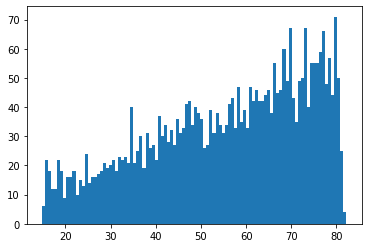

In [39]:
pp.hist(elecP,bins=100)

In [40]:
dfPlot=pd.DataFrame({'X':elecP,'Y':elecEta})

In [41]:
beamEIndex

6

In [42]:
dfPlot

,X,Y
0,43.393678,1.513781
3,48.340440,2.011601
6,63.791328,2.484172
9,48.378968,2.020438
12,55.149587,1.658942
...,...,...
9987,73.740517,1.594591
9990,35.610373,0.080841
9993,62.324774,1.757212
9996,74.994804,1.567245


In [43]:
pp.hist2d(dfPlot)

TypeError: hist2d() missing 1 required positional argument: 'y'

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.5  , -0.465, -0.43 , -0.395, -0.36 , -0.325, -0.29 , -0.255,
        -0.22 , -0.185, -0.15 , -0.115, -0.08 , -0.045, -0.01 ,  0.025,
         0.06 ,  0.095,  0.13 ,  0.165,  0.2  ,  0.235,  0.27 ,  0.305,
         0.34 ,  0.375,  0.41 ,  0.445,  0.48 ,  0.515,  0.55 ,  0.585,
         0.62 ,  0.655,  0.69 ,  0.725,  0.76 ,  0.795,  0.83 ,  0.865,
         0.9  ,  0.935,  0.97 ,  1.005,  1.04 ,  1.075,  1.11 ,  1.145,
         1.18 ,  1.215,  1.25 ,  1.285,  1.32 ,  1.355,  1.39 ,  1.425,
         1.46 ,  1.495,  1.53 ,  1.565,  1.6  ,  1.635,  1.67 ,  1.705,
         1.74 ,  1.775,  1.81 ,  1.845,  1.88 ,  1.915,  1.95 ,  1.985,
         2.02 ,  2.055,  2.09 ,  2.125,  2.16 ,  2.195,  2.23 ,  2.265,
         2.3  ,  2.335,  2.37 ,

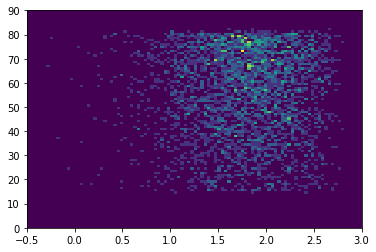

In [46]:
pp.hist2d(y=elecP,x=elecEta,bins=100,range=[[-0.5,3.0],[0,90]])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 3.  ,  3.15,  3.3 ,  3.45,  3.6 ,  3.75,  3.9 ,  4.05,  4.2 ,
         4.35,  4.5 ,  4.65,  4.8 ,  4.95,  5.1 ,  5.25,  5.4 ,  5.55,
         5.7 ,  5.85,  6.  ,  6.15,  6.3 ,  6.45,  6.6 ,  6.75,  6.9 ,
         7.05,  7.2 ,  7.35,  7.5 ,  7.65,  7.8 ,  7.95,  8.1 ,  8.25,
         8.4 ,  8.55,  8.7 ,  8.85,  9.  ,  9.15,  9.3 ,  9.45,  9.6 ,
         9.75,  9.9 , 10.05, 10.2 , 10.35, 10.5 , 10.65, 10.8 , 10.95,
        11.1 , 11.25, 11.4 , 11.55, 11.7 , 11.85, 12.  , 12.15, 12.3 ,
        12.45, 12.6 , 12.75, 12.9 , 13.05, 13.2 , 13.35, 13.5 , 13.65,
        13.8 , 13.95, 14.1 , 14.25, 14.4 , 14.55, 14.7 , 14.85, 15.  ,
        15.15, 15.3 , 15.45, 15.6 , 15.75, 15.9 , 16.05, 16.2 , 16.35,
        16.5 , 16.65, 16.8 , 16.95, 17.1 

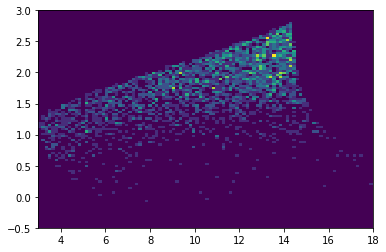

In [52]:
pp.hist2d(x=elecP,y=elecEta,bins=100,range=[[3,18],[-0.5,3]])

In [50]:
beamEIndex=0

In [34]:
elecEta0=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==-11,'eta']

In [35]:
piPlusEta0=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==211,'eta']

In [36]:
piMinusEta0=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==-211,'eta']

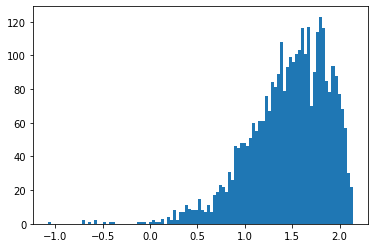

In [37]:
hElecEta0=pp.hist(elecEta0,bins=100)

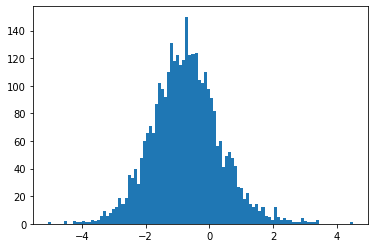

In [38]:
hPiMinusEta0=pp.hist(piMinusEta0,bins=100)

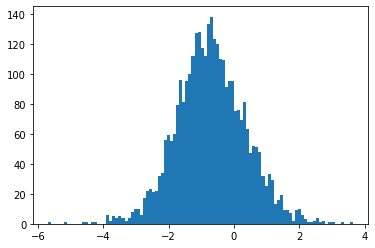

In [39]:
hPiPlusEta0=pp.hist(piPlusEta0,bins=100)

In [40]:
elecP0=myDFs[beamEIndex].head(10000).loc[myDFs[beamEIndex].head(10000)['pdg']==-11,'p']

In [41]:
dfPlot0=pd.DataFrame({'X':elecP0,'Y':elecEta0})

In [42]:
dfPlot0

,X,Y
0,2.358655,1.373109
3,1.816069,1.146066
6,2.733030,1.492953
9,3.949320,1.835027
12,2.978900,1.315217
...,...,...
9987,3.822159,1.595948
9990,1.447323,1.529662
9993,3.608322,2.036098
9996,2.553901,1.616686


In [43]:
pp.hist2d(dfPlot0)

TypeError: hist2d() missing 1 required positional argument: 'y'

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.5  , -0.465, -0.43 , -0.395, -0.36 , -0.325, -0.29 , -0.255,
        -0.22 , -0.185, -0.15 , -0.115, -0.08 , -0.045, -0.01 ,  0.025,
         0.06 ,  0.095,  0.13 ,  0.165,  0.2  ,  0.235,  0.27 ,  0.305,
         0.34 ,  0.375,  0.41 ,  0.445,  0.48 ,  0.515,  0.55 ,  0.585,
         0.62 ,  0.655,  0.69 ,  0.725,  0.76 ,  0.795,  0.83 ,  0.865,
         0.9  ,  0.935,  0.97 ,  1.005,  1.04 ,  1.075,  1.11 ,  1.145,
         1.18 ,  1.215,  1.25 ,  1.285,  1.32 ,  1.355,  1.39 ,  1.425,
         1.46 ,  1.495,  1.53 ,  1.565,  1.6  ,  1.635,  1.67 ,  1.705,
         1.74 ,  1.775,  1.81 ,  1.845,  1.88 ,  1.915,  1.95 ,  1.985,
         2.02 ,  2.055,  2.09 ,  2.125,  2.16 ,  2.195,  2.23 ,  2.265,
         2.3  ,  2.335,  2.37 ,

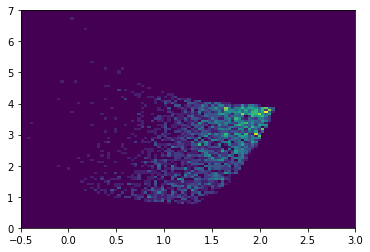

In [44]:
pp.hist2d(y=elecP0,x=elecEta0,bins=100,range=[[-0.5,3.0],[0,7]])

(array([[0., 0., 0., ..., 1., 0., 4.],
        [0., 0., 0., ..., 3., 3., 1.],
        [0., 0., 0., ..., 1., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 ,
        3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05,
        4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 ,
        4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95, 5.  , 5.05, 5.1 , 5.15,
        5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 , 5.55, 5.6 , 5.65, 5.7 ,
        5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05, 6.1 , 6.15, 6.2 , 6.25,
        6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 , 6.65, 6.7 , 6.75, 6.8 ,
        6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15, 7.2 , 7.25, 7.3 , 7.35,
        7.4 , 7.45, 7.5 , 7.55, 7.6 , 7.65, 7.7 , 7.75, 7.8 , 7.85, 7.9 ,
        7.95, 8.  ]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36,

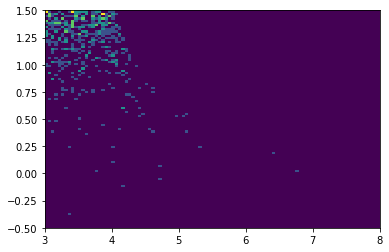

In [45]:
pp.hist2d(x=elecP0,y=elecEta0,bins=100,range=[[3,8],[-0.5,1.5]])